                Growth Rate  TFP Growth  Capital Deepening  TFP Share  \
Canada             0.887700    0.580760           0.306940   0.653810   
Germany            0.661055    0.411357           0.249698   0.629270   
France             0.829236    0.512309           0.316927   0.618806   
United Kingdom     1.015544    0.588315           0.427229   0.587007   
Italy             -0.037181   -0.019589          -0.017592   0.515165   
Japan              0.710956    0.405471           0.305485   0.569399   
United States      1.536985    0.939222           0.597763   0.606740   
Average            0.800614    0.488263           0.312350   0.597171   

                Capital Share  
Canada               0.346190  
Germany              0.370730  
France               0.381194  
United Kingdom       0.412993  
Italy                0.484835  
Japan                0.430601  
United States        0.393260  
Average              0.402829  


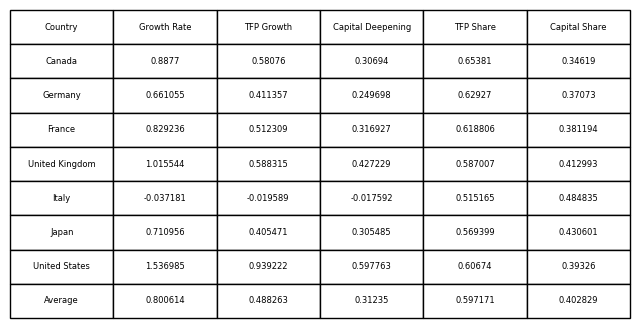

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
pwt1001 = pd.read_stata('https://dataverse.nl/api/access/datafile/354098')

# Filter and select relevant columns
data = pwt1001.loc[pwt1001['country'].isin(["France", "Germany", "Canada", "Italy", "Japan", "United Kingdom", "United States"])][['year', 'countrycode', 'rgdpna', 'rkna', 'emp', 'labsh']]
data = data.loc[(data['year'] >= 1995) & (data['year'] <= 2019)].dropna()

# Calculate additional columns
data['y_pc'] = np.log(data['rgdpna'] / data['emp'])  # GDP per worker
data['k_pc'] = np.log(data['rkna'] / data['emp'])  # Capital per worker
data['a'] = 1 - data['labsh']  # Capital share
data['b'] = data['labsh']  # TFP share


# Order by year
data = data.sort_values('year')

# Group by isocode
grouped_data = data.groupby('countrycode')

# Calculate growth rates and Solow residual
data['g'] = (grouped_data['y_pc'].diff() * 100)  # Growth rate of GDP per capital

data['t'] = data['g'] * data['b'] # TFP Growth
data['c'] = data['g'] * data['a'] # Capital Growth

# Remove missing values
data = data.dropna()

# Calculate summary statistics
summary = data.groupby('countrycode').agg({'g': 'mean', 'a': "mean", 'b': "mean", 't': 'mean', 'c': 'mean'})

# Calculate additional summary statistics
summary['Growth Rate'] = summary['g']
summary['TFP Growth'] = summary['t']
summary['Capital Deepening'] = summary['c']
summary['TFP Share'] = summary['b']
summary['Capital Share'] = summary['a']

cols_to_drop = ['g', 't', 'c', 'b', 'a']
summary = summary.drop(cols_to_drop, axis=1)

average_row = pd.DataFrame(summary.mean(axis=0)).T

summary = pd.concat([summary, average_row], ignore_index=True)

# Rename row
summary.index = ['Canada', 'Germany', 'France', 'United Kingdom', 'Italy', 'Japan', 'United States', 'Average']

# Print output
print(summary)


# Data Preparation
data = {
    'Country': ['Canada', 'Germany', 'France', 'United Kingdom', 'Italy', 'Japan', 'United States', 'Average'],
    'Growth Rate': [0.887700, 0.661055, 0.829236, 1.015544, -0.037181, 0.710956, 1.536985, 0.800614],
    'TFP Growth': [0.580760, 0.411357, 0.512309, 0.588315, -0.019589, 0.405471, 0.939222, 0.488263],
    'Capital Deepening': [0.306940, 0.249698, 0.316927, 0.427229, -0.017592, 0.305485, 0.597763, 0.312350],
    'TFP Share': [0.653810, 0.629270, 0.618806, 0.587007, 0.515165, 0.569399, 0.606740, 0.597171],
    'Capital Share': [0.346190, 0.370730, 0.381194, 0.412993, 0.484835, 0.430601, 0.393260, 0.402829]
}

df = pd.DataFrame(data)

# Table Output
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])

plt.show()